## Tarea Semanal Nro 3 | Introducción a estimación espectral

#### **Introducción y fundamentos teóricos**
##### *Propuesta*

Para esta tarea semanal se trabajó sobre una señal

$$
x(t) = a_1 \cdot \sin(\Omega_1 \cdot t) + n_a(t)
$$

Con una frecuencia descripta como:

$$
\Omega_1 = \Omega_0 + f_r \cdot \frac{2\pi}{N}
$$

$$
\Omega_0 = \frac{\pi}{2}
$$

y variables aleatorias definidas por:

$$
f_r \sim \mathcal{U}\left(-\frac{1}{2}, \frac{1}{2}\right)
$$

$$
n_a \sim \mathcal{N}(0, \sigma^2)
$$

##### *La trampa caza bobos y como evitarla*

Al iniciar el trabajo de programación, todxs los alumnos cometimos el mismo error: Copiar la fórmula de la señal tal cual venía dada en la consigna y el profesor nos retó por caer en la trampa caza bobos.

Pero... ¿Dónde está el engaño?

Resulta que en la consigna el profesor nos muestra la propuesta usando una señal temporal CONTINUA, con frecuencia $f0=1/4 Hz$. Nuestro objetivo es simular una señal muestreada con $n=t \cdot f_s$ en la que se puedan modificar parámetros y jugar con las variables, por lo tanto, la fórmula generalizada quedaría así:

$$
x(n) = a_1 \cdot \sin\left(2\pi \cdot f_1 \cdot \frac{n}{f_s}\right) + n_a(n)
$$

donde la frecuencia $f_1$ está descrita por:

$$
f_1 = f_0 + f_r \cdot df
$$

y los parámetros $ f_0 $ y $ df $ se definen como:

$$
f_0 = \frac{f_s}{4}
$$

$$
df = \frac{f_s}{N}
$$

##### *Estimadores*

Los estimadores sirven para calcular con mayor o menor presición determinados parámetros de una señal. En este caso usaremos:

$$
\hat{a}_1^i = |X_w^i(\Omega_0)| = \left| \mathcal{F} \{ x(n) \cdot w_i(n) \} \right|
$$

$$
\hat{\Omega}_1^i = \underset{f}{arg\,max} \left\{ |X_w^i(\Omega)| \right\}
$$

##### *Ventanas*

Al muestrear una señal, implicitamente se la convoluciona con una ventana rectangular. Al calcular el espectro de esa señal, tambien se transorma la ventana convirtiendose en una sink que, dependiendo de nuestra resolución espectral $df = \frac{f_s}{N}$, si es un numero entero o no, puede traernos problemas. Cuando tenemos una resolución espectral NO entera, los puntos de muestreo no caen justo sobre los valles de la sink y la energía se "desparrama".

Para corregir este desparrame o mejorar el resultado de nuestro espectro, una buena opción es usar ventanas como la Harryblackman Harris o Flattop. Para aplicarlas, simplemente basta con multiplicarlas por la señal temporal antes de transformarla.
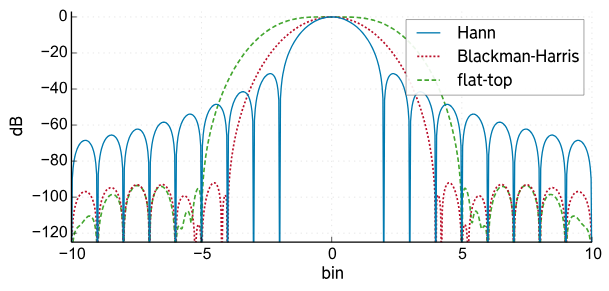



#### Con la propuesta clara, ahora sí, comencemos con los experimentos!!!

### Experimentación
#### Carga de las librerías

In [16]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import blackmanharris, flattop

##### Definición de las señales a trabajar

In [17]:
# Carga de variables
numero_de_pruebas = 200
SNR = 10  # dB
N = 1000  # número de muestras
fs = 1000  # frecuencia de muestreo en Hz
a1 = np.sqrt(2)  # Amplitud de la señal normalizada para que la potencia sea 1w

# Calculo de parámetros
df = fs / N  # resolución espectral en Hz
pot_ruido = 10 ** (-SNR / 10)  # Potencia del ruido
f0 = fs / 4  # frecuencia central en Hz
fr = np.random.uniform(-0.5, 0.5, (1, numero_de_pruebas))
f1 = f0 + fr * df  
nn = np.random.normal(0, np.sqrt(pot_ruido), (N, numero_de_pruebas))

# Generación de la señal de prueba
n = np.arange(N).reshape(-1, 1)  # (N, 1)
pruebas = a1 * np.sin(2 * np.pi * f1 * n / fs) + nn  # Señal de prueba

# Aplicar la ventana de Blackman-Harris
ventana_bh = blackmanharris(N)
pruebas_vent_bh = pruebas * ventana_bh[:, np.newaxis]

# Aplicar la ventana de Flattop
ventana_ft = flattop(N)
pruebas_vent_ft = pruebas * ventana_ft[:, np.newaxis]



##### Gráfico temporal

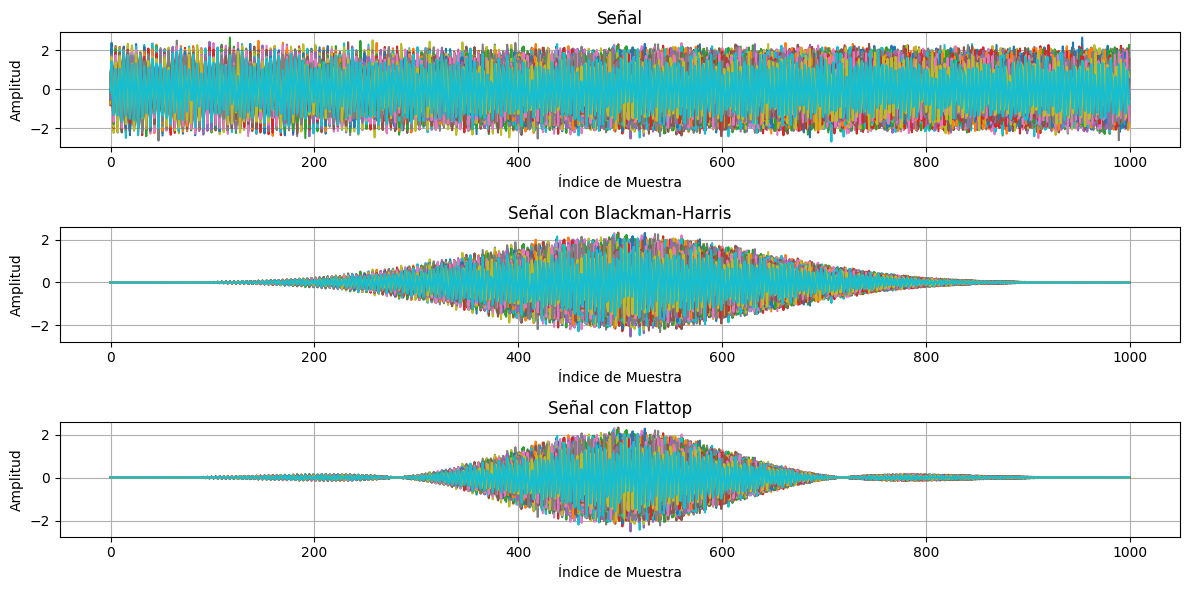

In [18]:

# === Gráfico de señales temporales ===

plt.figure(1,figsize=(12, 6))

#PRUEBA
plt.subplot(3, 1, 1)
plt.plot(n, pruebas[:, :numero_de_pruebas]) 
plt.title('Señal')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)


#VENTANA BH
plt.subplot(3, 1, 2)
plt.plot(n, pruebas_vent_bh[:, :numero_de_pruebas])  
plt.title('Señal con Blackman-Harris')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)


#VENTANA FT
plt.subplot(3, 1, 3)
plt.plot(n, pruebas_vent_ft[:, :numero_de_pruebas]) 
plt.title('Señal con Flattop')
plt.xlabel('Índice de Muestra')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()




##### Gráfico del espectro

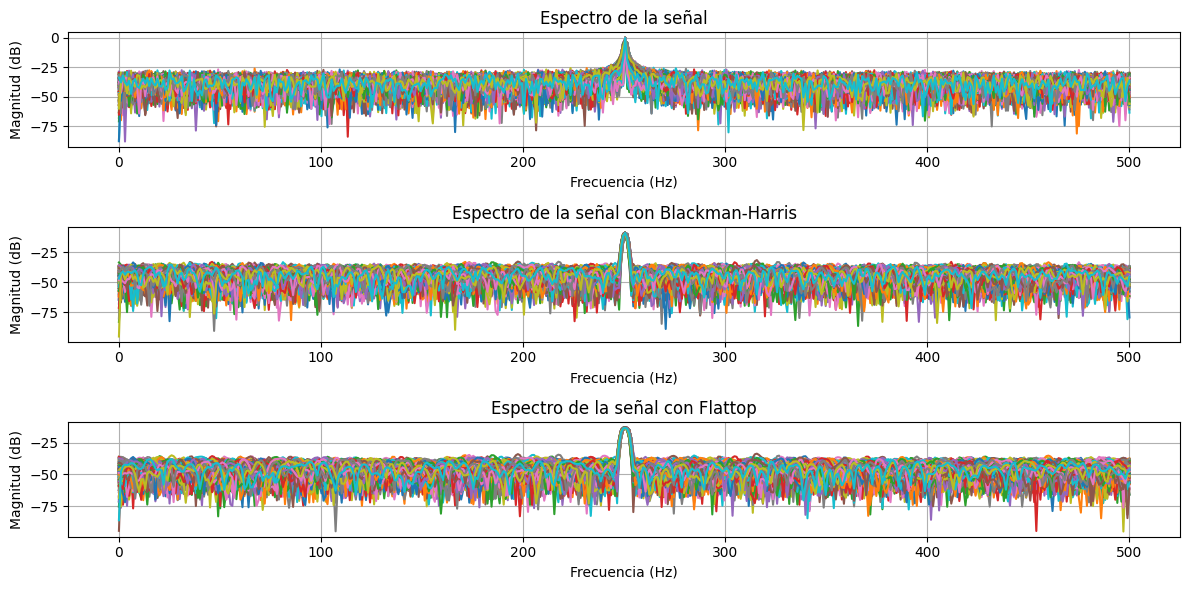

In [19]:

# === Gráfico del espectro ===


plt.figure(2,figsize=(12, 6))

# Eje de frecuencias hasta Nyquist (fs/2)
ff = np.linspace(0, fs/2, N//2)


#PRUEBA
ft_S = np.fft.fft(pruebas[:, :numero_de_pruebas], axis=0)/N
pot = 2 * np.abs(ft_S[:N//2, :])**2  # tomamos sólo hasta fs/2
pot_dB = 10 * np.log10(pot)

plt.subplot(3, 1, 1)
plt.plot(ff, pot_dB)
plt.title('Espectro de la señal')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)


#VENTANA BH
ft_S_bh = np.fft.fft(pruebas_vent_bh[:, :numero_de_pruebas], axis=0)/N
pot_bh = 2 * np.abs(ft_S_bh[:N//2, :])**2  # tomamos sólo hasta fs/2
pot_dB_bh = 10 * np.log10(pot_bh)

plt.subplot(3, 1, 2)
plt.plot(ff, pot_dB_bh)
plt.title('Espectro de la señal con Blackman-Harris')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)



#VENTANA FT
ft_S_ft = np.fft.fft(pruebas_vent_ft[:, :numero_de_pruebas], axis=0)/N
pot_ft = 2 * np.abs(ft_S_ft[:N//2, :])**2 
pot_dB_ft = 10 * np.log10(pot_ft)

plt.subplot(3, 1, 3)
plt.plot(ff, pot_dB_ft)
plt.title('Espectro de la señal con Flattop')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)

plt.tight_layout()
plt.show()




##### Cálculo del estimador a y visualización de resultados

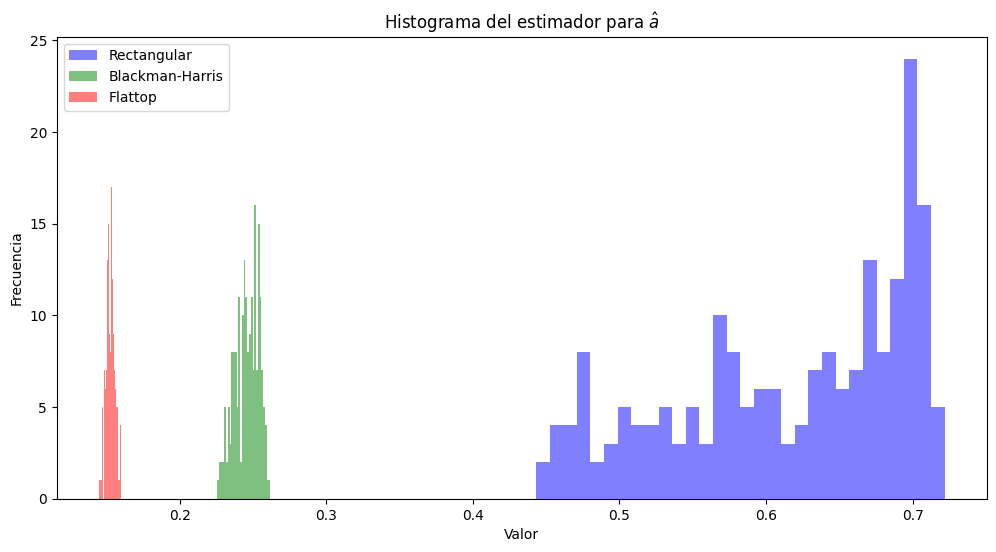

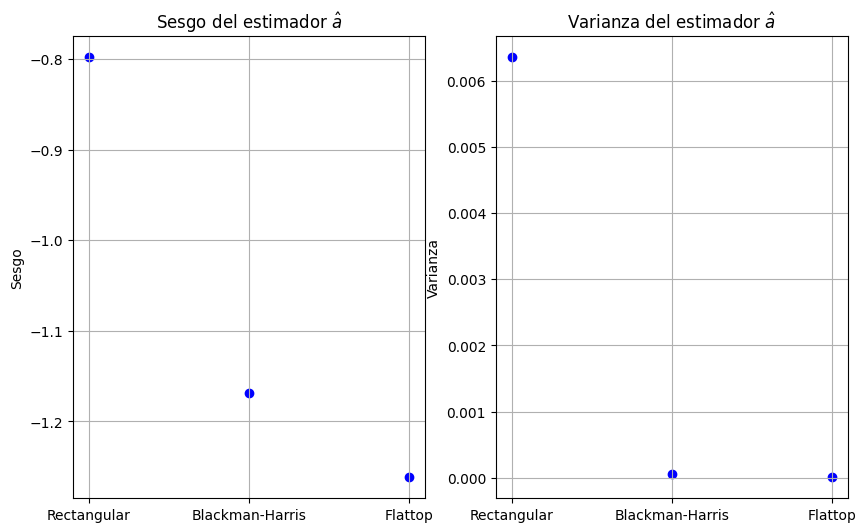

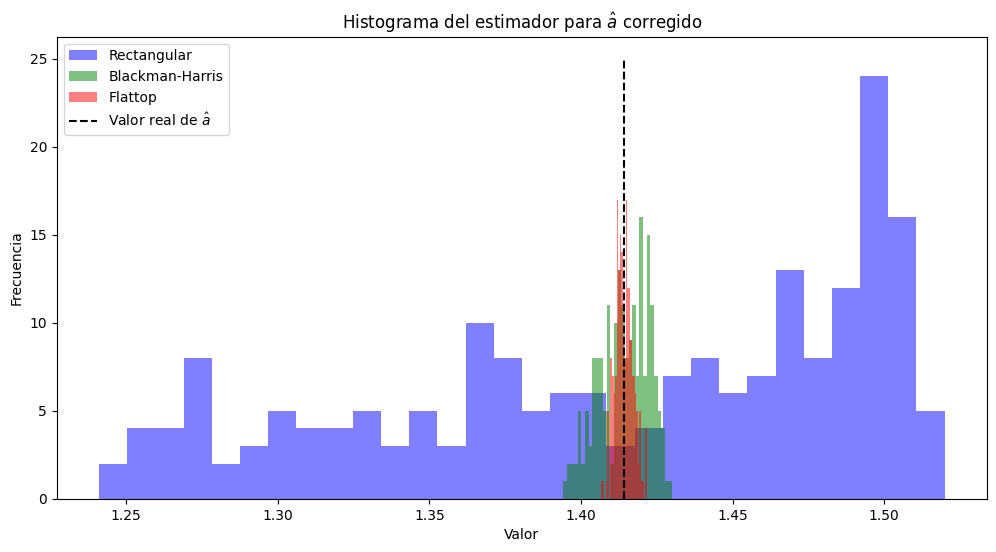

In [42]:

# Cálculo del estimador a

a_est = np.abs(ft_S[round(f0)] )  
a_est_bh = np.abs(ft_S_bh[round(f0)])  
a_est_ft = np.abs(ft_S_ft[round(f0)] )  

plt.figure(3,figsize=(12, 6))
plt.hist(a_est, bins=30, alpha=0.5, label='Rectangular', color='blue')
plt.hist(a_est_bh, bins=30, alpha=0.5, label='Blackman-Harris', color='green')
plt.hist(a_est_ft, bins=30, alpha=0.5, label='Flattop', color='red')
plt.title('Histograma del estimador para $\hat{a}$')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Cálculo del sesgo

sesgo = np.mean(a_est) - a1
sesgo_bh = np.mean(a_est_bh) - a1
sesgo_ft = np.mean(a_est_ft) - a1


# Cálculo de la varianza
varianza = np.std(a_est)**2
varianza_bh = np.std(a_est_bh)**2
varianza_ft= np.std(a_est_ft)**2

plt.figure(2,figsize=(10, 6))
plt.subplot(1,2,1)
plt.scatter([1, 2, 3], [sesgo, sesgo_bh, sesgo_ft], color='blue')
labels = ['Rectangular', 'Blackman-Harris', 'Flattop']
plt.xticks([1, 2, 3], labels)
plt.title('Sesgo del estimador $\hat{a}$')
plt.ylabel('Sesgo')
plt.grid(True)

plt.subplot(1,2, 2)
plt.scatter([1, 2, 3], [varianza, varianza_bh, varianza_ft], color='blue')
labels = ['Rectangular', 'Blackman-Harris', 'Flattop']
plt.xticks([1, 2, 3], labels)
plt.title('Varianza del estimador $\hat{a}$')
plt.ylabel('Varianza')
plt.grid(True)
plt.show()

plt.figure(3,figsize=(12, 6))
plt.hist(a_est-sesgo, bins=30, alpha=0.5, label='Rectangular', color='blue')
plt.hist(a_est_bh-sesgo_bh, bins=30, alpha=0.5, label='Blackman-Harris', color='green')
plt.hist(a_est_ft-sesgo_ft, bins=30, alpha=0.5, label='Flattop', color='red')
plt.plot([a1, a1], [0, 25], 'k--', label='Valor real de $\hat{a}$')
plt.title('Histograma del estimador para $\hat{a}$ corregido')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()










##### Estimador de Omega